<a href="https://colab.research.google.com/github/jeenalmehta/DataAnalytics/blob/master/Experiment1_EDA/Jeenal_DA_Exp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing required libraries

import pandas as pd
import numpy as np

#using seaborn library for visualisation
import seaborn as sns 

#library for visualisation
import matplotlib.pyplot as plt 
from matplotlib import pyplot as plt

%matplotlib inline 
sns.set(color_codes=True)

In [ ]:
#loading data
df = pd.read_csv("HT_2013-2020.csv") 

In [ ]:
#displaying top 5 rows
df.head(5)  

,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,COUNTY_NAME,REGION_NAME,POPULATION_GROUP_CODE,POPULATION_GROUP_DESC,OFFENSE_SUBCAT_ID,OFFENSE_NAME,OFFENSE_SUBCAT_NAME,ACTUAL_COUNT,UNFOUNDED_COUNT,CLEARED_COUNT,JUVENILE_CLEARED_COUNT
0,2016,MO0480600,Independence,NaN,City,MO,Missouri,West North Central,JACKSON,Midwest,2,"Cities from 100,000 thru 249,999",81,Human Trafficking,Commercial Sex Acts,2,0,2,0
1,2016,TX2201200,Fort Worth,NaN,City,TX,Texas,West South Central,PARKER; DENTON; TARRANT,South,1B,"Cities from 500,000 thru 999,999",82,Human Trafficking,Involuntary Servitude,1,0,0,0
2,2016,TX2270100,Austin,NaN,City,TX,Texas,West South Central,WILLIAMSON; TRAVIS,South,1B,"Cities from 500,000 thru 999,999",82,Human Trafficking,Involuntary Servitude,2,0,0,0
3,2019,NV0020100,Las Vegas Metropolitan Police Department,NaN,City,NV,Nevada,Mountain,CLARK,West,1A,"Cities 1,000,000 or over",81,Human Trafficking,Commercial Sex Acts,15,0,4,0
4,2017,AZ0070500,Chandler,NaN,City,AZ,Arizona,Mountain,MARICOPA,West,2,"Cities from 100,000 thru 249,999",81,Human Trafficking,Commercial Sex Acts,1,0,0,0


In [ ]:
#displaying bottom 5 rows
df.tail(5) 

,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,COUNTY_NAME,REGION_NAME,POPULATION_GROUP_CODE,POPULATION_GROUP_DESC,OFFENSE_SUBCAT_ID,OFFENSE_NAME,OFFENSE_SUBCAT_NAME,ACTUAL_COUNT,UNFOUNDED_COUNT,CLEARED_COUNT,JUVENILE_CLEARED_COUNT
4412,2019,KY0370000,Franklin,NaN,County,KY,Kentucky,East South Central,FRANKLIN,South,8C,"Non-MSA counties from 10,000 thru 24,999",82,Human Trafficking,Involuntary Servitude,2,0,0,0
4413,2019,KY0370000,Franklin,NaN,County,KY,Kentucky,East South Central,FRANKLIN,South,8C,"Non-MSA counties from 10,000 thru 24,999",82,Human Trafficking,Involuntary Servitude,1,0,0,0
4414,2020,KY0370000,Franklin,NaN,County,KY,Kentucky,East South Central,FRANKLIN,South,8C,"Non-MSA counties from 10,000 thru 24,999",81,Human Trafficking,Commercial Sex Acts,1,0,0,0
4415,2020,KY0370000,Franklin,NaN,County,KY,Kentucky,East South Central,FRANKLIN,South,8C,"Non-MSA counties from 10,000 thru 24,999",81,Human Trafficking,Commercial Sex Acts,1,0,0,0
4416,2020,KY0370000,Franklin,NaN,County,KY,Kentucky,East South Central,FRANKLIN,South,8C,"Non-MSA counties from 10,000 thru 24,999",81,Human Trafficking,Commercial Sex Acts,1,0,0,0


In [ ]:
#understanding the dataset features, datatypes, null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4417 entries, 0 to 4416
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   DATA_YEAR               4417 non-null   int64 
 1   ORI                     4417 non-null   object
 2   PUB_AGENCY_NAME         4417 non-null   object
 3   PUB_AGENCY_UNIT         214 non-null    object
 4   AGENCY_TYPE_NAME        4417 non-null   object
 5   STATE_ABBR              4417 non-null   object
 6   STATE_NAME              4417 non-null   object
 7   DIVISION_NAME           4417 non-null   object
 8   COUNTY_NAME             4306 non-null   object
 9   REGION_NAME             4417 non-null   object
 10  POPULATION_GROUP_CODE   4417 non-null   object
 11  POPULATION_GROUP_DESC   4417 non-null   object
 12  OFFENSE_SUBCAT_ID       4417 non-null   int64 
 13  OFFENSE_NAME            4417 non-null   object
 14  OFFENSE_SUBCAT_NAME     4417 non-null   object
 15  ACTU

As we can see above, this dataset has 19 features or columns. Some columns being more important than others. For ease of EDA, we will remove the columns not required. 
In our dataset, we have 6 integer datatype and 13 object datatype columns. There are a total of 4417 samples.

PUB_AGENCY_UNIT and COUNTY_NAME are the features that contain missing values.

In [ ]:
df.describe()

,DATA_YEAR,OFFENSE_SUBCAT_ID,ACTUAL_COUNT,UNFOUNDED_COUNT,CLEARED_COUNT,JUVENILE_CLEARED_COUNT
count,4417.000000,4417.000000,4417.000000,4417.000000,4417.000000,4417.000000
mean,2017.884763,81.194476,2.173194,0.072674,0.837673,0.032601
std,1.843414,0.395841,3.128820,0.926374,2.069699,0.433354
min,2013.000000,81.000000,-1.000000,0.000000,0.000000,0.000000
25%,2017.000000,81.000000,1.000000,0.000000,0.000000,0.000000
50%,2018.000000,81.000000,1.000000,0.000000,0.000000,0.000000
75%,2019.000000,81.000000,2.000000,0.000000,1.000000,0.000000
max,2020.000000,82.000000,67.000000,47.000000,41.000000,19.000000


In [ ]:
#to get the number of features (which is basically no of columns of the dataset)
len(df.columns) 

19

In [ ]:
#this gives us the number of samples
len(df)

4417

In [ ]:
#to get the structure/dimension of the data
df.shape 

(4417, 19)

In [ ]:
#renaming columns
df = df.rename(columns={"DATA_YEAR": "Year", "ACTUAL_COUNT": "ReportedCases_Total","UNFOUNDED_COUNT": "FakeCases_Total"})
df.head(5)

,Year,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,COUNTY_NAME,REGION_NAME,POPULATION_GROUP_CODE,POPULATION_GROUP_DESC,OFFENSE_SUBCAT_ID,OFFENSE_NAME,OFFENSE_SUBCAT_NAME,ReportedCases_Total,FakeCases_Total,CLEARED_COUNT,JUVENILE_CLEARED_COUNT
0,2016,MO0480600,Independence,NaN,City,MO,Missouri,West North Central,JACKSON,Midwest,2,"Cities from 100,000 thru 249,999",81,Human Trafficking,Commercial Sex Acts,2,0,2,0
1,2016,TX2201200,Fort Worth,NaN,City,TX,Texas,West South Central,PARKER; DENTON; TARRANT,South,1B,"Cities from 500,000 thru 999,999",82,Human Trafficking,Involuntary Servitude,1,0,0,0
2,2016,TX2270100,Austin,NaN,City,TX,Texas,West South Central,WILLIAMSON; TRAVIS,South,1B,"Cities from 500,000 thru 999,999",82,Human Trafficking,Involuntary Servitude,2,0,0,0
3,2019,NV0020100,Las Vegas Metropolitan Police Department,NaN,City,NV,Nevada,Mountain,CLARK,West,1A,"Cities 1,000,000 or over",81,Human Trafficking,Commercial Sex Acts,15,0,4,0
4,2017,AZ0070500,Chandler,NaN,City,AZ,Arizona,Mountain,MARICOPA,West,2,"Cities from 100,000 thru 249,999",81,Human Trafficking,Commercial Sex Acts,1,0,0,0


In [ ]:
#dropping irrelevant columns
df = df.drop(['ORI', 'PUB_AGENCY_NAME','PUB_AGENCY_UNIT','AGENCY_TYPE_NAME','COUNTY_NAME','REGION_NAME','POPULATION_GROUP_CODE','POPULATION_GROUP_DESC', 'OFFENSE_SUBCAT_ID', 'OFFENSE_NAME'], axis=1)
df.head(5)

,Year,STATE_ABBR,STATE_NAME,DIVISION_NAME,OFFENSE_SUBCAT_NAME,ReportedCases_Total,FakeCases_Total,CLEARED_COUNT,JUVENILE_CLEARED_COUNT
0,2016,MO,Missouri,West North Central,Commercial Sex Acts,2,0,2,0
1,2016,TX,Texas,West South Central,Involuntary Servitude,1,0,0,0
2,2016,TX,Texas,West South Central,Involuntary Servitude,2,0,0,0
3,2019,NV,Nevada,Mountain,Commercial Sex Acts,15,0,4,0
4,2017,AZ,Arizona,Mountain,Commercial Sex Acts,1,0,0,0


In [ ]:
#number of unique values for each relevant column
df.nunique()

Year                       8
STATE_ABBR                46
STATE_NAME                46
DIVISION_NAME              9
OFFENSE_SUBCAT_NAME        2
ReportedCases_Total       32
FakeCases_Total           15
CLEARED_COUNT             26
JUVENILE_CLEARED_COUNT     8
dtype: int64

In [ ]:
#sorted unique elements of an array
df['STATE_NAME'].unique()

array(['Missouri', 'Texas', 'Nevada', 'Arizona', 'North Dakota',
       'Georgia', 'Louisiana', 'Oklahoma', 'Wisconsin', 'Colorado',
       'Ohio', 'Massachusetts', 'Connecticut', 'Michigan', 'Virginia',
       'South Dakota', 'Oregon', 'North Carolina', 'Kentucky', 'Alaska',
       'Minnesota', 'Tennessee', 'Delaware', 'South Carolina',
       'Washington', 'Maryland', 'New Hampshire', 'Illinois', 'Florida',
       'West Virginia', 'Vermont', 'Hawaii', 'Utah', 'New Mexico',
       'Indiana', 'Rhode Island', 'Arkansas', 'Wyoming', 'Nebraska',
       'Montana', 'New Jersey', 'Mississippi', 'Kansas', 'Pennsylvania',
       'Maine', 'Idaho'], dtype=object)

In [ ]:
df['Year'].unique()

array([2016, 2019, 2017, 2018, 2020, 2015, 2014, 2013])

In [ ]:
df['OFFENSE_SUBCAT_NAME'].unique()

array(['Commercial Sex Acts', 'Involuntary Servitude'], dtype=object)

Now, we have the list of all the state names for which we have the data. We also know that the data pertains to the years 2013 to 2020 for the subcategories Commercial Sex Acts and Involuntary Servitude under Human Trafficking.

In [ ]:
#no of rows present in each column
df.count()

Year                      4417
STATE_ABBR                4417
STATE_NAME                4417
DIVISION_NAME             4417
OFFENSE_SUBCAT_NAME       4417
ReportedCases_Total       4417
FakeCases_Total           4417
CLEARED_COUNT             4417
JUVENILE_CLEARED_COUNT    4417
dtype: int64

In [ ]:
#checking for any missing or null values 
print(df.isnull().sum())  

Year                      0
STATE_ABBR                0
STATE_NAME                0
DIVISION_NAME             0
OFFENSE_SUBCAT_NAME       0
ReportedCases_Total       0
FakeCases_Total           0
CLEARED_COUNT             0
JUVENILE_CLEARED_COUNT    0
dtype: int64


Dataset contains no missing values.

We now take sum of all factors to do comparison for visualisation.


In [ ]:
df.groupby(by="STATE_NAME")["ReportedCases_Total"].sum()

STATE_NAME
Alaska              43
Arizona            273
Arkansas            19
Colorado           276
Connecticut         49
Delaware            53
Florida            640
Georgia            276
Hawaii              23
Idaho               11
Illinois           246
Indiana             80
Kansas               7
Kentucky           219
Louisiana          232
Maine               12
Maryland            79
Massachusetts      153
Michigan           183
Minnesota          972
Mississippi          3
Missouri           160
Montana             14
Nebraska             5
Nevada             965
New Hampshire       11
New Jersey          13
New Mexico          16
North Carolina     126
North Dakota        37
Ohio                41
Oklahoma           170
Oregon             127
Pennsylvania         7
Rhode Island        52
South Carolina     136
South Dakota         8
Tennessee          363
Texas             2370
Utah               177
Vermont             17
Virginia           133
Washington         258


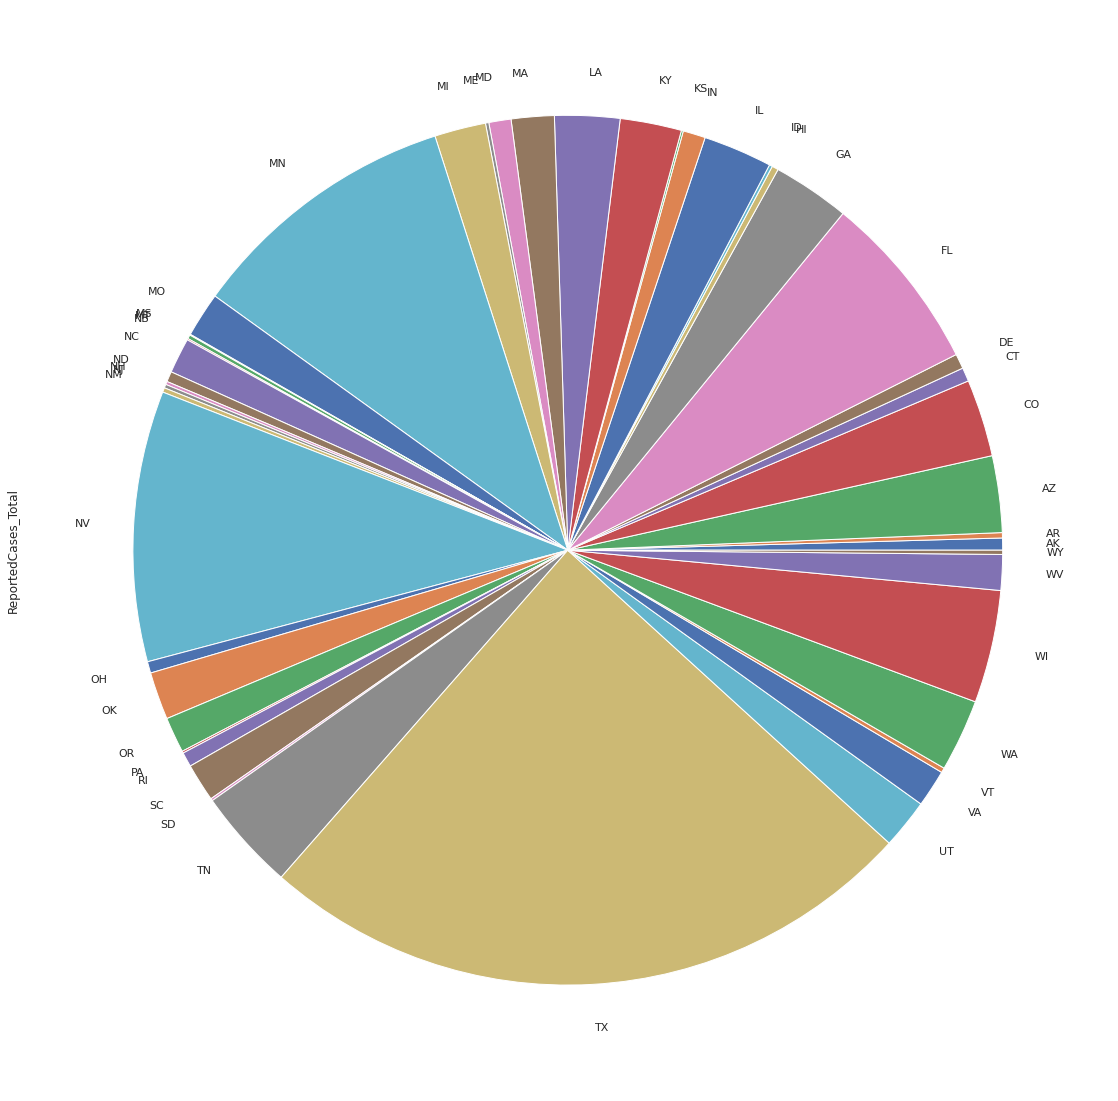

In [ ]:
#sum of total reported cases for each state
plt.figure(figsize=[20,20])

df_totalreported_perstate = df.groupby(by="STATE_ABBR")["ReportedCases_Total"].sum().plot(kind="pie")

df_totalreported_perstate

Texas (TX) has the maximum no. of total cases reported.

In [ ]:
#sum of total fake cases for each state
df_totalfake_perstate = df.groupby(by="STATE_NAME")["FakeCases_Total"].sum()

df_totalfake_perstate

STATE_NAME
Alaska              1
Arizona             8
Arkansas            0
Colorado            0
Connecticut         0
Delaware            0
Florida           241
Georgia             0
Hawaii              0
Idaho               0
Illinois            0
Indiana             0
Kansas              0
Kentucky            0
Louisiana           0
Maine               0
Maryland            1
Massachusetts       0
Michigan            0
Minnesota           1
Mississippi         0
Missouri            0
Montana             0
Nebraska            0
Nevada             27
New Hampshire       0
New Jersey          0
New Mexico          0
North Carolina      0
North Dakota        0
Ohio                0
Oklahoma            3
Oregon              0
Pennsylvania        0
Rhode Island        0
South Carolina      0
South Dakota        0
Tennessee           0
Texas              39
Utah                0
Vermont             0
Virginia            0
Washington          0
West Virginia       0
Wisconsin           0

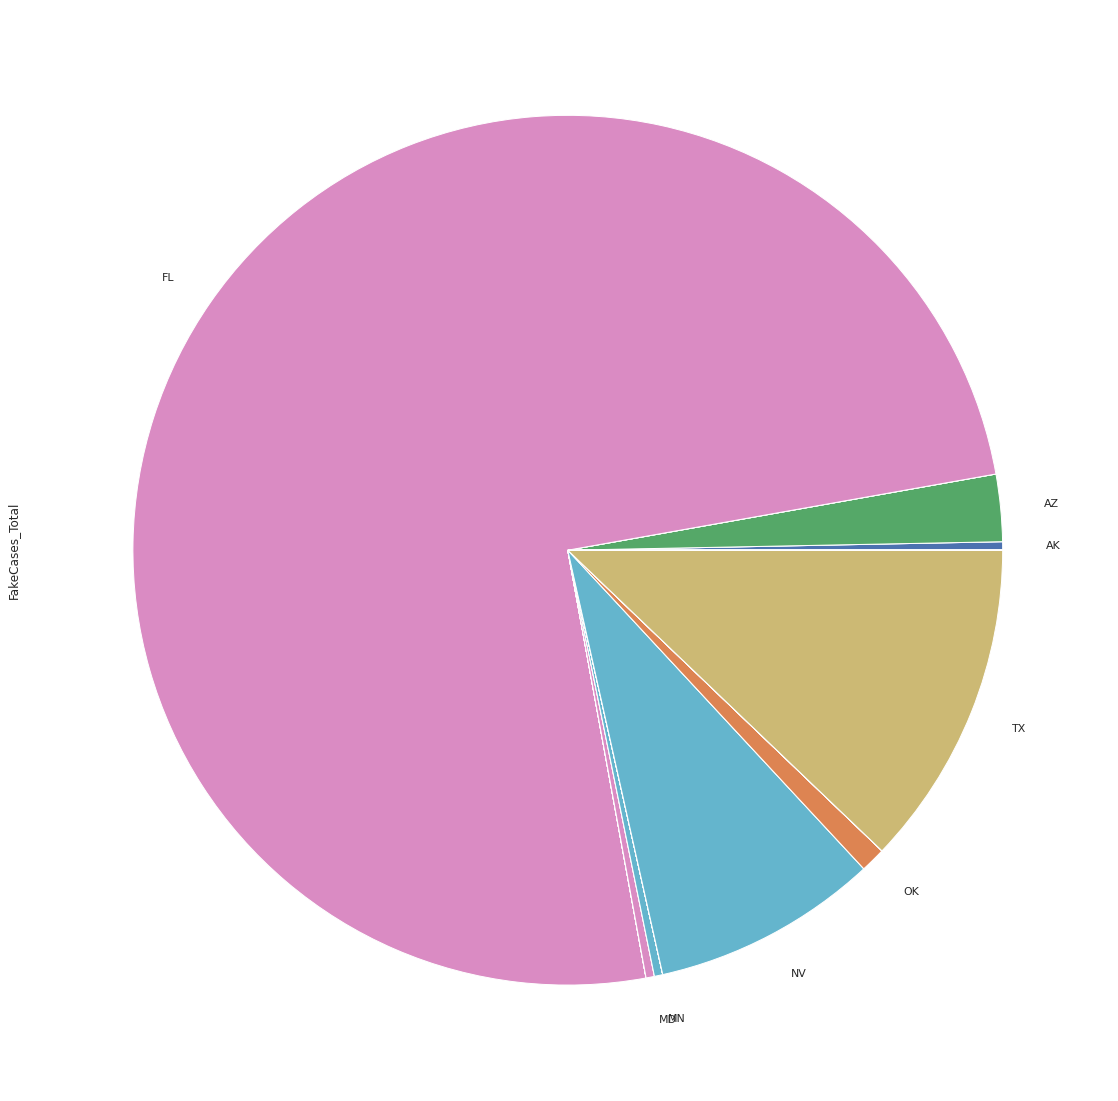

In [ ]:
plt.figure(figsize=[20,20])

df_totalfake_perstate = df.groupby(by="STATE_ABBR")["FakeCases_Total"].sum().plot(kind="pie")

df_totalfake_perstate

Florida (FL) has the maximum no. of fake cases.

In [ ]:
#sum of total cleared cases for each state
df_totalfake_perstate = df.groupby(by="STATE_NAME")["CLEARED_COUNT"].sum()

df_totalfake_perstate

STATE_NAME
Alaska             11
Arizona            88
Arkansas            8
Colorado           53
Connecticut         3
Delaware           12
Florida           343
Georgia            60
Hawaii              3
Idaho               1
Illinois            1
Indiana             9
Kansas              5
Kentucky           29
Louisiana         175
Maine               4
Maryland           46
Massachusetts      44
Michigan           73
Minnesota         626
Mississippi         1
Missouri           69
Montana             1
Nebraska            0
Nevada            351
New Hampshire       2
New Jersey         10
New Mexico          2
North Carolina     16
North Dakota        2
Ohio                7
Oklahoma          117
Oregon             21
Pennsylvania        2
Rhode Island       19
South Carolina     30
South Dakota        1
Tennessee         120
Texas             855
Utah              119
Vermont             4
Virginia           68
Washington         95
West Virginia      13
Wisconsin         170

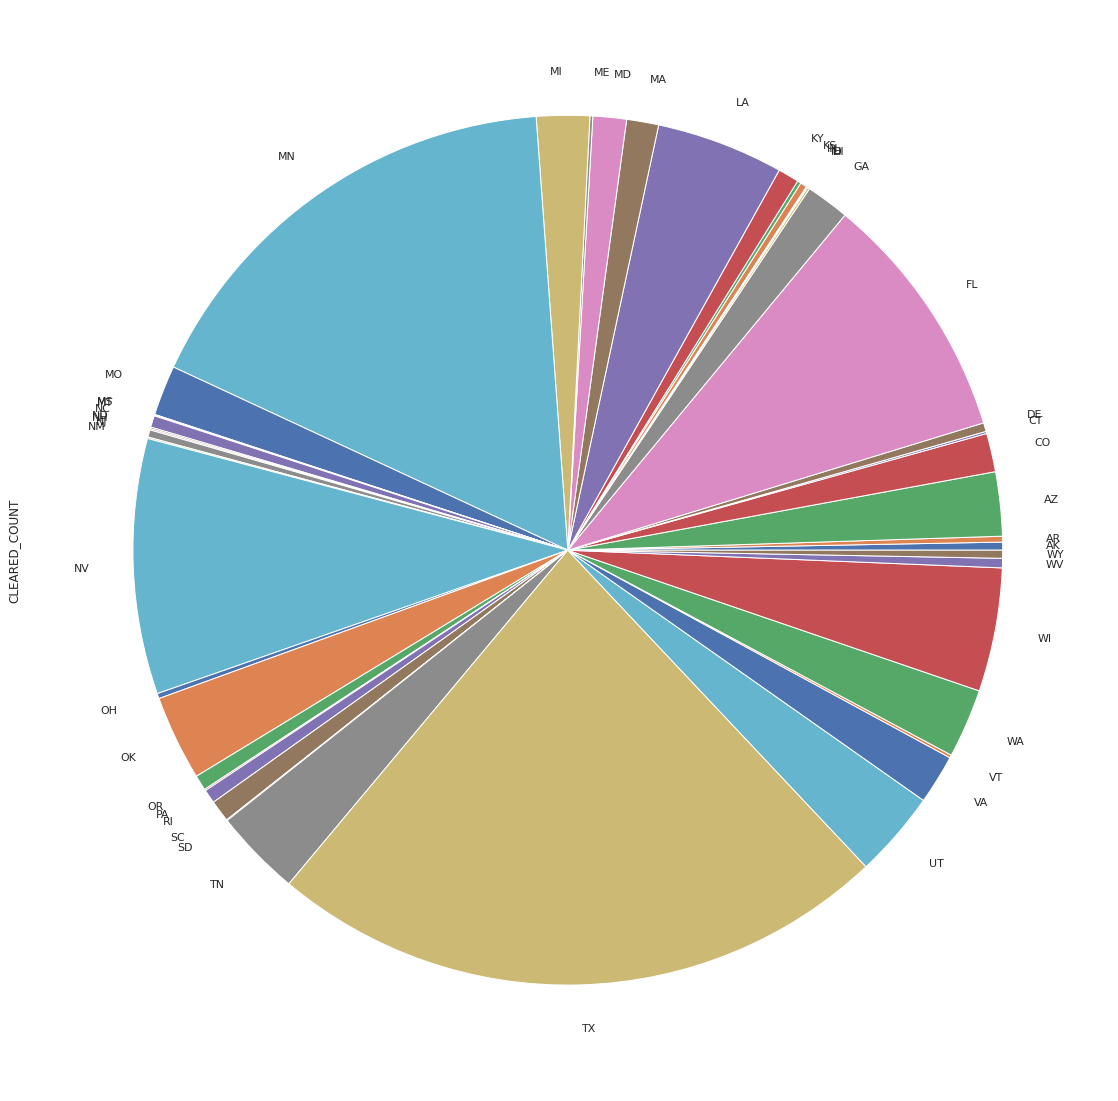

In [ ]:
plt.figure(figsize=[20,20])
df_totalfake_perstate = df.groupby(by="STATE_ABBR")["CLEARED_COUNT"].sum().plot(kind="pie")

df_totalfake_perstate

In [ ]:
#remove
def sum_frame_by_column(frame, new_col_name, list_of_cols_to_sum):
    frame[new_col_name] = frame[list_of_cols_to_sum].astype(float).sum(axis=1)
    return(frame)
sum_frame_by_column(df, 'total', ['CLEARED_COUNT','JUVENILE_CLEARED_COUNT'])

df.head(5)

,Year,STATE_NAME,DIVISION_NAME,OFFENSE_SUBCAT_NAME,ReportedCases_Total,FakeCases_Total,CLEARED_COUNT,JUVENILE_CLEARED_COUNT,total
0,2016,Missouri,West North Central,Commercial Sex Acts,2,0,2,0,4.0
1,2016,Texas,West South Central,Involuntary Servitude,1,0,0,0,1.0
2,2016,Texas,West South Central,Involuntary Servitude,2,0,0,0,2.0
3,2019,Nevada,Mountain,Commercial Sex Acts,15,0,4,0,19.0
4,2017,Arizona,Mountain,Commercial Sex Acts,1,0,0,0,1.0


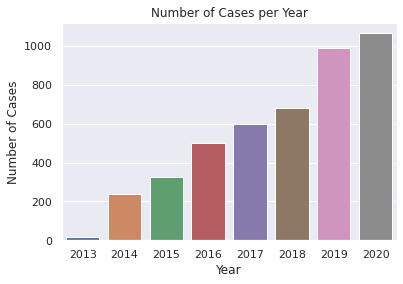

In [ ]:
sns.countplot(data=df, x="Year")
plt.title("Number of Cases per Year")
plt.ylabel("Number of Cases")
plt.show()

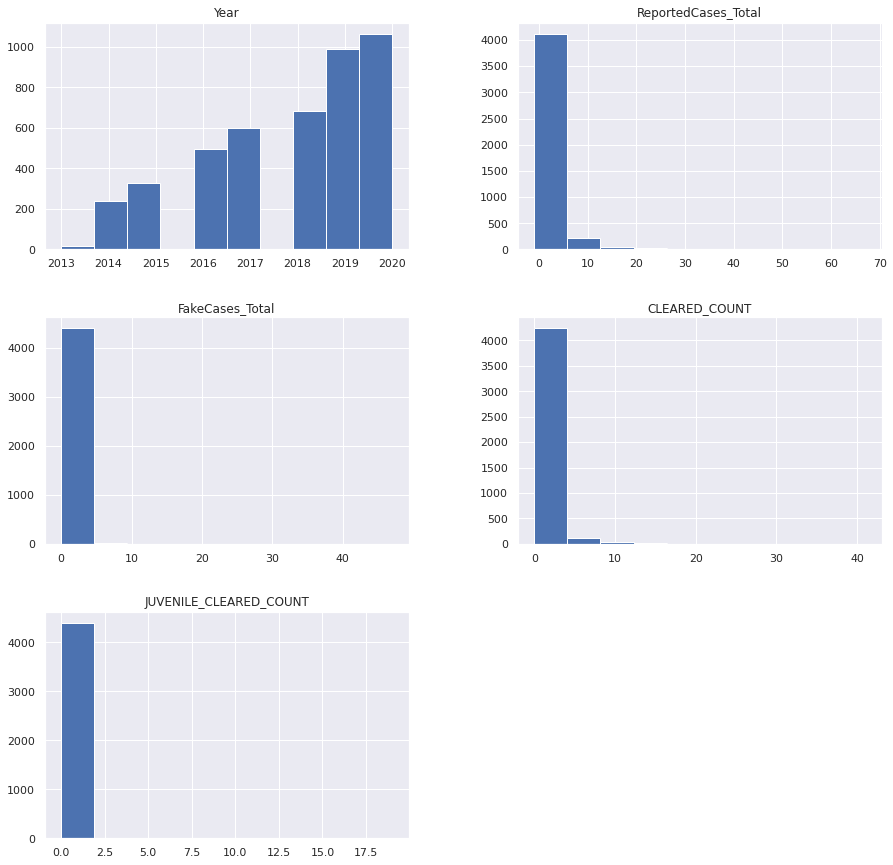

In [ ]:
#plotting a histogram of the data’s numeric features in a grid
df.hist(figsize=(15,15))
plt.show()

Observations from above histograms:

1.   Crime rate in the category of 'Human Trafficking' has increased each year.
2.   Almost no cases were closed that involved a juvenile each year.
3.   In most states, the no. of baseless complaints reported were zero.



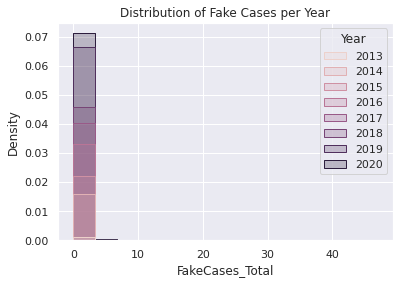

In [ ]:
#Distribution of Fake Cases per Year
sns.histplot(df,x="FakeCases_Total", hue="Year", element="step", stat="density")
plt.title("Distribution of Fake Cases per Year")
plt.show()

Now before having different types of plots we will identfy and remove the outliers. It's often a good idea to detect and remove the outliers. Because outliers are one of the primary reasons for resulting in a less accurate model. The outlier detection and removing that we are going to perform is called IQR score technique.

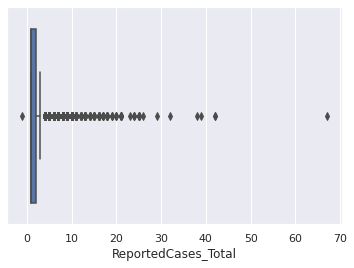

In [ ]:
sns.boxplot(x=df['ReportedCases_Total'])

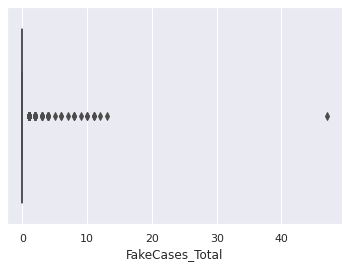

In [ ]:
sns.boxplot(x=df['FakeCases_Total'])

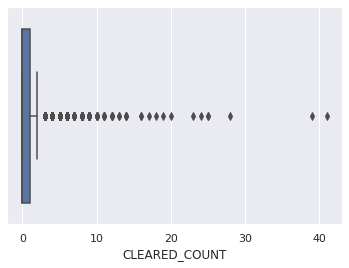

In [ ]:
sns.boxplot(x=df['CLEARED_COUNT'])

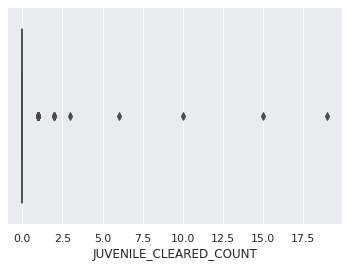

In [ ]:
sns.boxplot(x=df['JUVENILE_CLEARED_COUNT'])

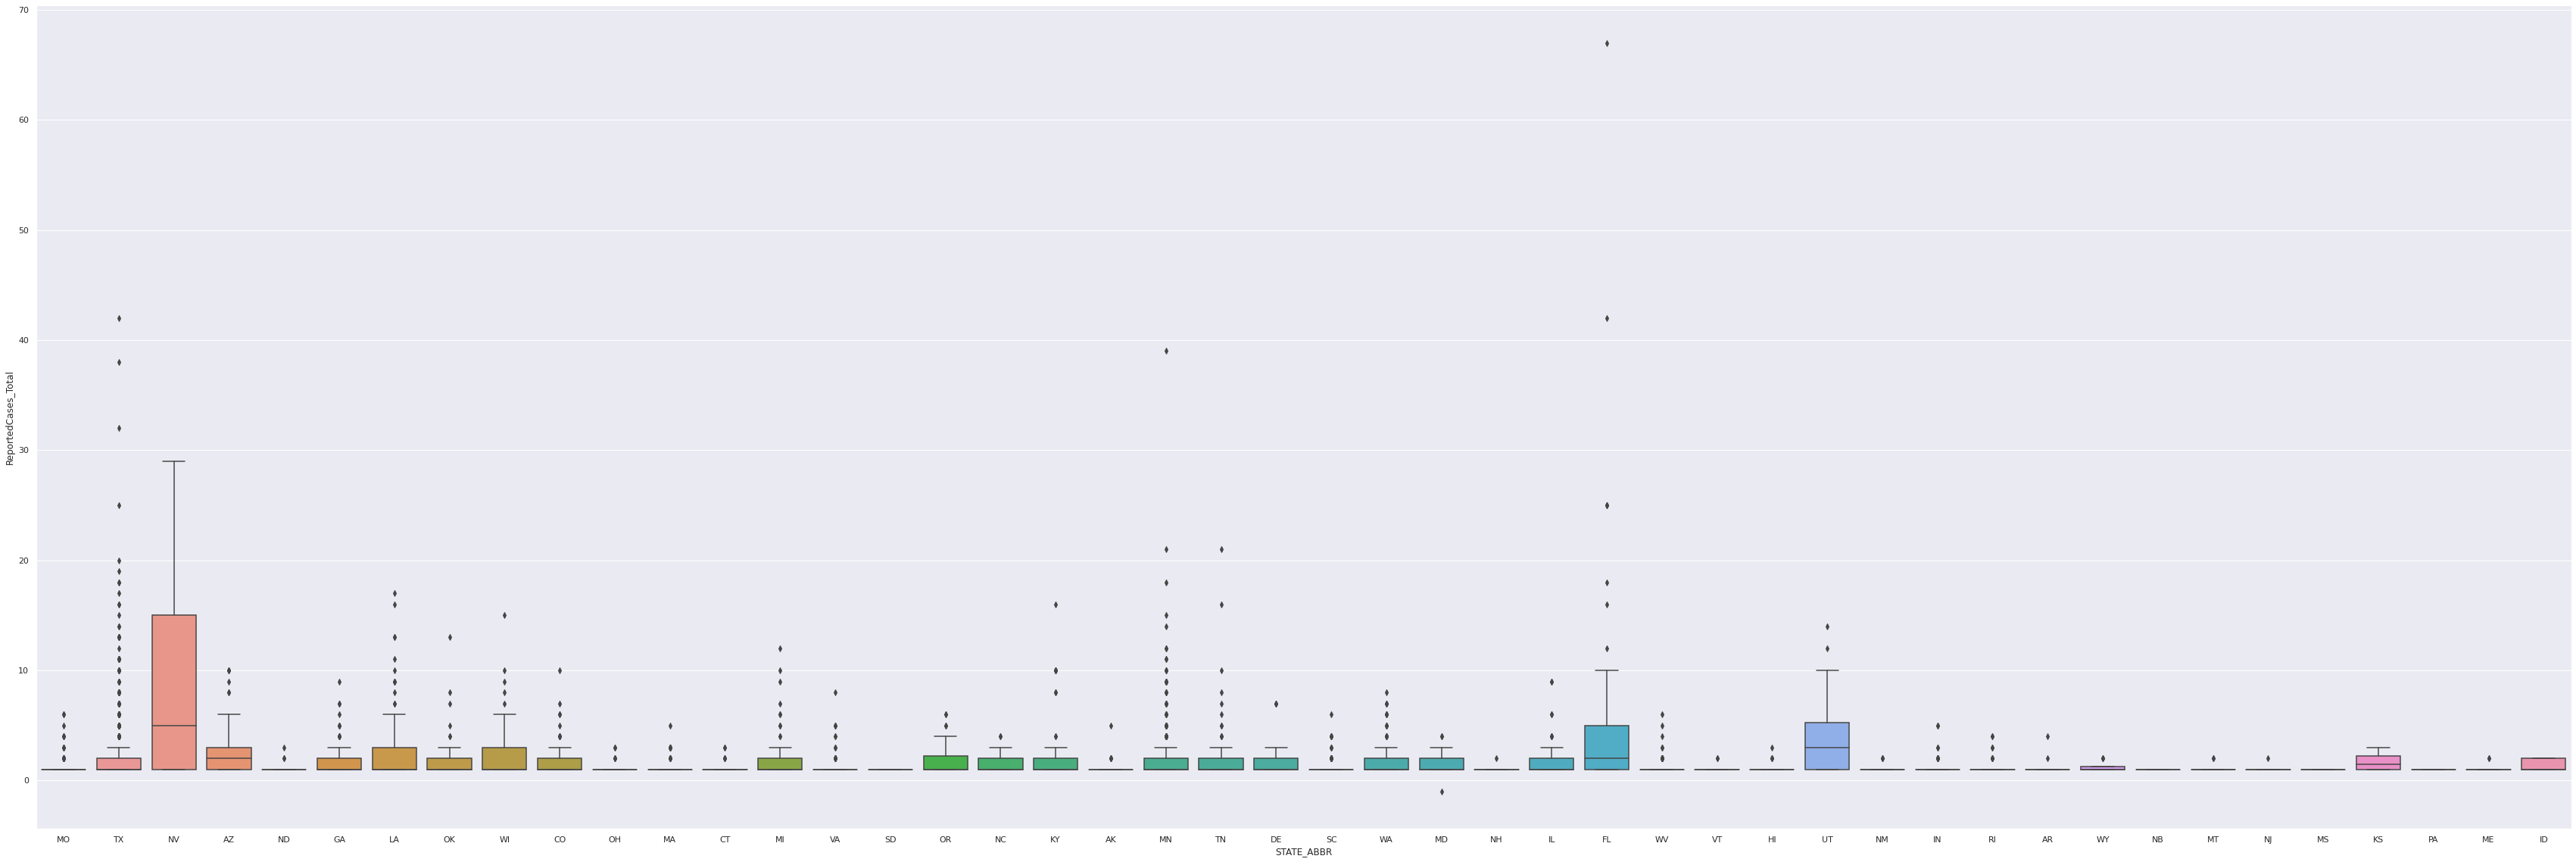

In [ ]:
plt.figure(figsize=[60,20])
sns.boxplot(x='STATE_ABBR', y='ReportedCases_Total', data=df)

In [ ]:
#using IQR to remove outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year                      2.0
ReportedCases_Total       1.0
FakeCases_Total           0.0
CLEARED_COUNT             1.0
JUVENILE_CLEARED_COUNT    0.0
dtype: float64


In [ ]:
#remove
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


(3651, 9)

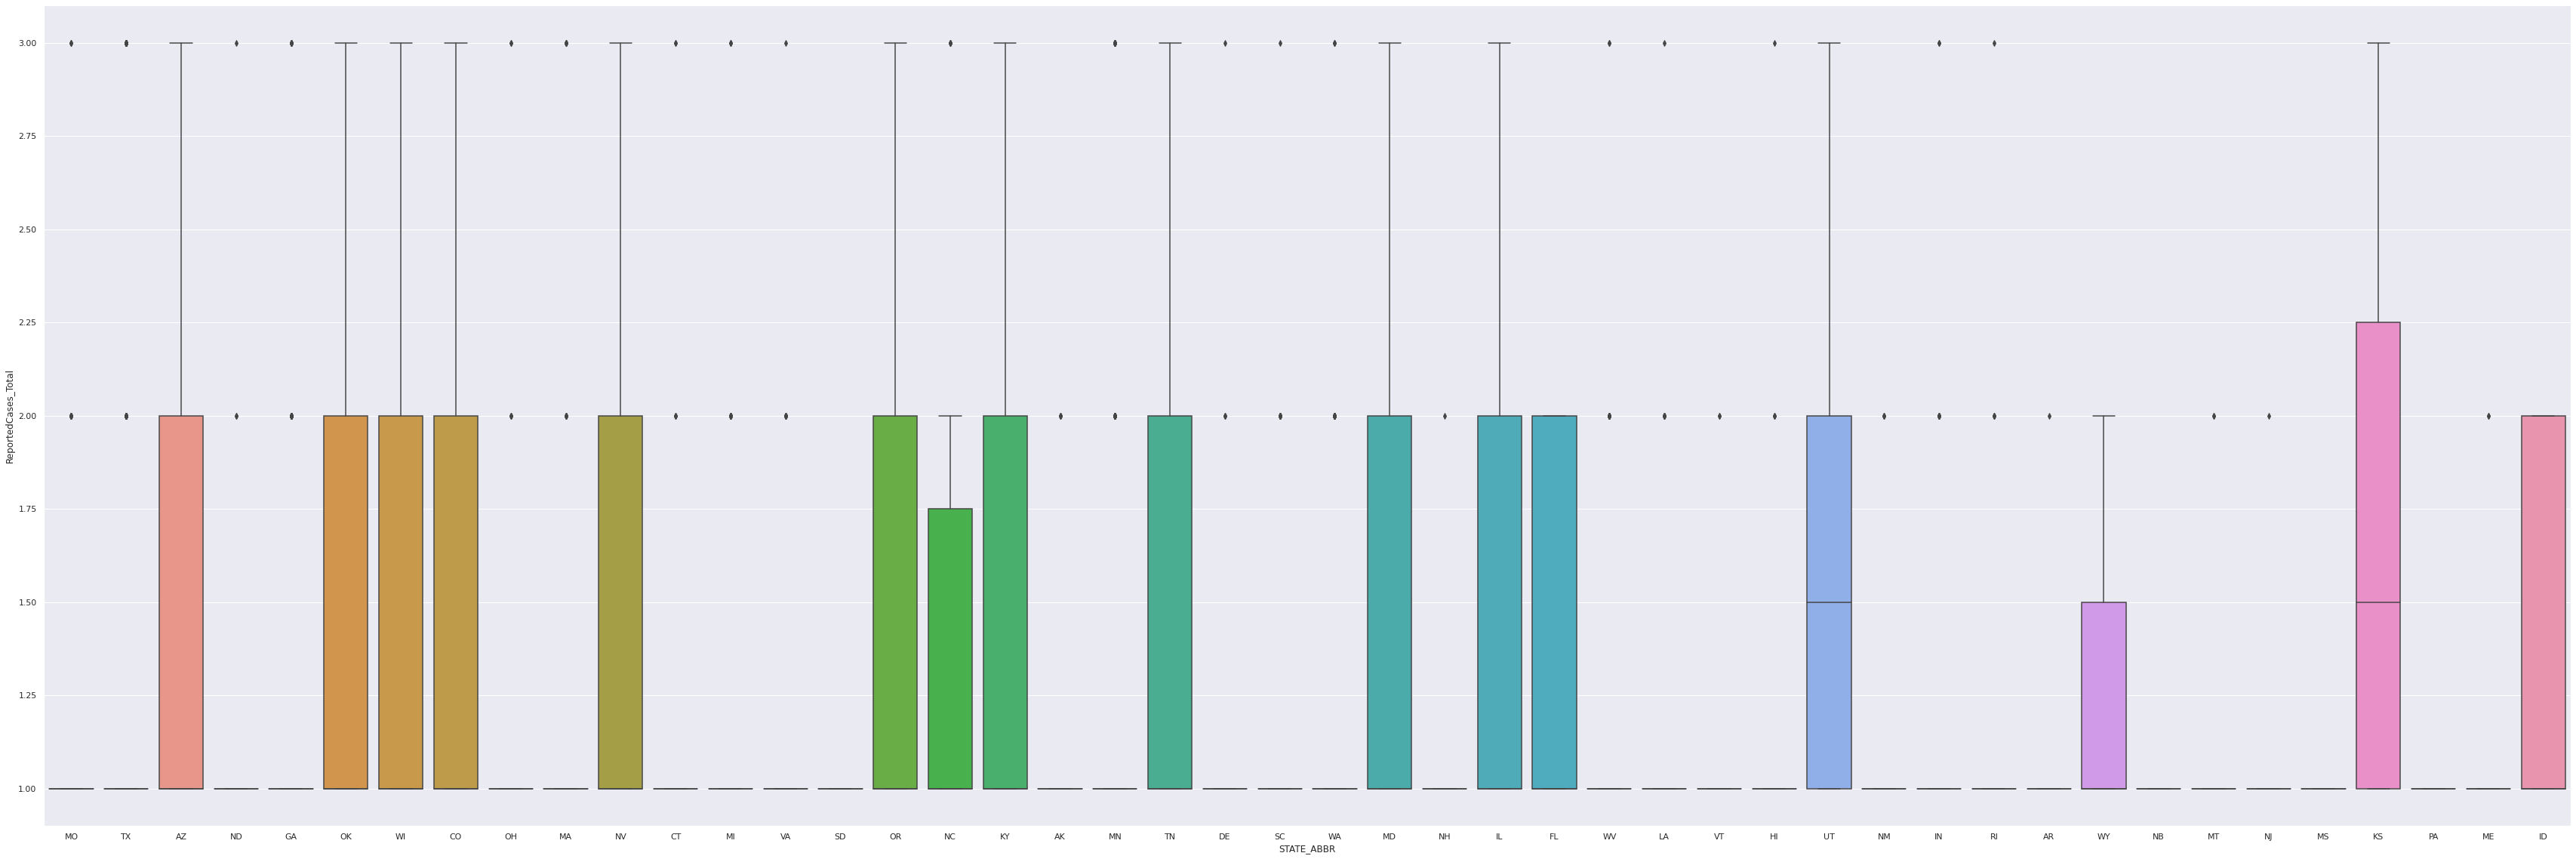

In [ ]:
plt.figure(figsize=[60,20])
sns.boxplot(x='STATE_ABBR', y='ReportedCases_Total', data=df)

,Year,ReportedCases_Total,FakeCases_Total,CLEARED_COUNT,JUVENILE_CLEARED_COUNT
Year,1.000000,-0.053790,NaN,-0.062908,NaN
ReportedCases_Total,-0.053790,1.000000,NaN,0.184218,NaN
FakeCases_Total,NaN,NaN,NaN,NaN,NaN
CLEARED_COUNT,-0.062908,0.184218,NaN,1.000000,NaN
JUVENILE_CLEARED_COUNT,NaN,NaN,NaN,NaN,NaN


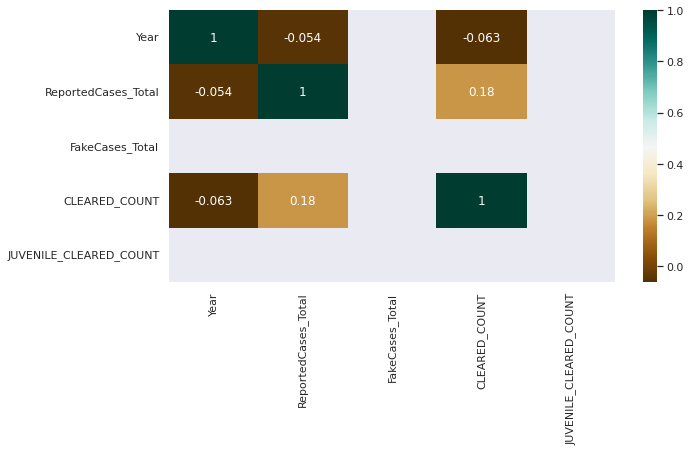

In [ ]:
#finding dependent variables using heat maps.  
plt.figure(figsize=(10,5))
c=df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

For this dataset, heamap wasn't as useful so we move on with other graphs.

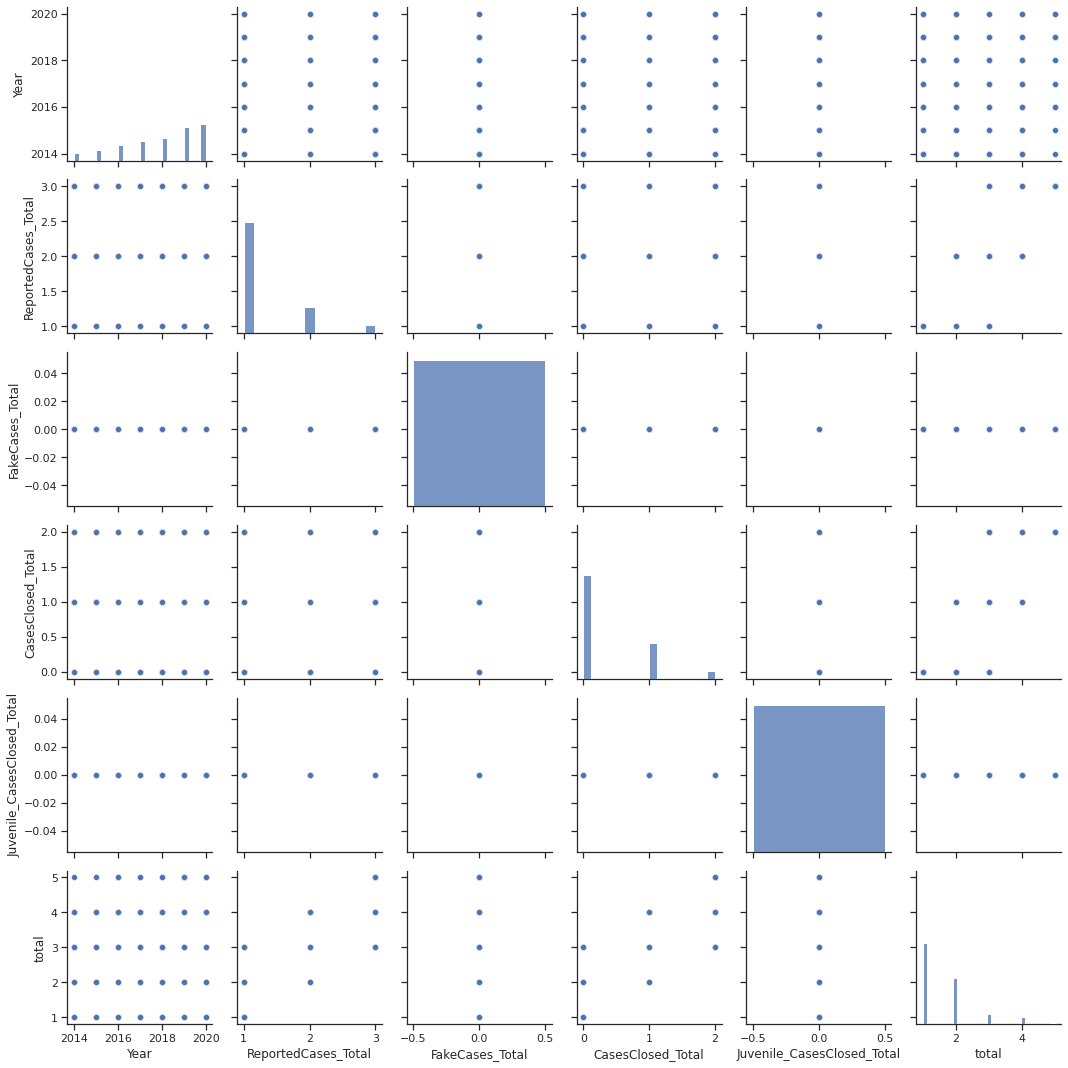

In [ ]:
#remove
sns.set(style="ticks", color_codes=True)
df = df.rename(columns={"CLEARED_COUNT": "CasesClosed_Total","JUVENILE_CLEARED_COUNT": "Juvenile_CasesClosed_Total"})
g = sns.pairplot(df, height=20,aspect=3)
g.fig.set_size_inches(15,15)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


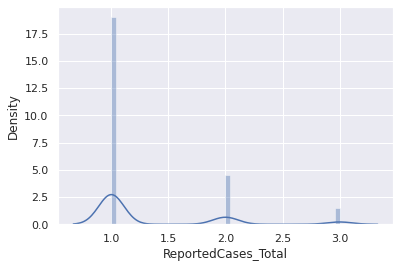

In [ ]:
sns.distplot(df['ReportedCases_Total'])

Maximum states saw a mean of 1 case being reported.

<BarContainer object of 2 artists>

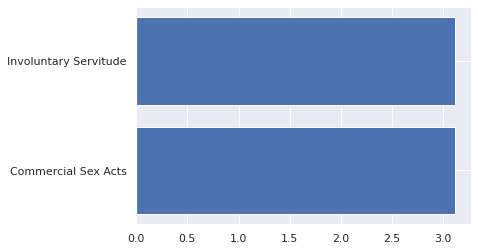

In [ ]:
plt.barh(df['OFFENSE_SUBCAT_NAME'].value_counts().keys(), width=df['total'].mean())

Similar number of cases were reported in the sub category of 'Involuntary Servitude' as 'Commercial Sex Acts'.

Conclusion: Hence we have successfully implemented Exploratory Data Analysis on the dataset obtained from the Human Trafficking Report of USA taken from FBI-CDE's website. Via this experiment we were able to learn how to sort and clean the data, to identify and remove missing values. We also saw easy ways to find the total number of data samples, number of features, number of classes, number of data samples per class etc. We even performed functions to remove outliers to model our program to give more structed and accurate results. Using seaborn library we plotted different graphs to a visual relation and representation between various factors. 
From this data analysis we were able to infer that Texax (TX) ranks number 1 in the amount of cases reported while FLorida (FL) ranks number 1 in the amount of fake cases reported. Exploratory Data Analysis (EDA) is a way to investigate datasets and find preliminary information, insights, or uncover underlying patterns in the data. Instead of making assumptions, data can be processed in a systematic method to gain insights and make informed decisions. Some advantages of Exploratory Data Analysis include: Improve understanding of variables by extracting averages, mean, minimum, and maximum values, etc; Discover errors, outliers, and missing values in the data; Identify patterns by visualizing data in graphs such as box plots, scatter plots, and histograms. Hence, the main goal is to understand the data better and use tools effectively to gain valuable insights or draw conclusions.